In [2]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
#df_uk = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\CleanedDataUK.xlsx')

#url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/CleanedDataUK.xlsx'
#df_uk = pd.read_excel(url)  # Works similarly for CSV

df_uk = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\unemployment rates and finbert-full time.xlsx')

df_uk

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\unemployment rates and finbert-full time.xlsx'

In [4]:
# Read the bank rate file and create the data frame
#df_bank_rates = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\bank_rates_years_months-2.xlsx')
#https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/bank_rates_years_months-2.xlsx
#df_bank_rates = pd.read_csv(r'C:\Users\elif.ozkol\Desktop\LSE Project\bank_rates_years_months.xlsx')

url_bank_rates = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/bank_rates_years_months-2.xlsx'
df_bank_rates = pd.read_excel(url_bank_rates)  # Works similarly for CSV

df_bank_rates

,BankRate,Year,Month
0,6.50,1997,June
1,6.75,1997,July
2,7.00,1997,August
3,7.00,1997,September
4,7.00,1997,October
...,...,...,...
310,5.00,2024,September
311,4.75,2024,November
312,4.75,2024,December
313,4.50,2025,February


In [6]:
df_uk.loc[:, 'Month'] = df_uk['Month'].astype(str)
df_bank_rates.loc[:, 'Month'] = df_bank_rates['Month'].astype(str)


In [9]:
monthly_rates = (
    df_bank_rates
    .groupby(['Year', 'Month'], as_index=False)
    .agg({'BankRate': 'last'})
)

df_merged_by_month = df_uk.merge(
    monthly_rates,
    on=['Year', 'Month'],
    how='left'
).rename(columns={'BankRate': 'BankRate'})


In [12]:
df_merged_by_month

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,BankRate
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,6.2,0.689918,0.196695,0.113387,0.083308,7.50
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,6.2,0.513907,0.484832,0.001261,0.483571,7.25
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,6.2,0.853627,0.020861,0.125512,-0.104651,7.25
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policy ma...,6.1,0.983629,0.015370,0.001001,0.014368,6.75
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,6.1,0.983659,0.015350,0.000991,0.014358,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...,3.7,0.790335,0.163924,0.045742,0.118182,0.75
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...,3.7,0.483925,0.515084,0.000991,0.514093,0.75
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...,3.8,0.867319,0.018150,0.114531,-0.096382,1.00
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...,3.9,0.983664,0.015353,0.000983,0.014370,2.25


**Group by Month**

In [15]:
# Ensure 'Month' column is treated as categorical with proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_merged_by_month['Month'] = pd.Categorical(df_merged_by_month['Month'], categories=month_order, ordered=True)

# Group and aggregate
monthly_avg_full_time = df_merged_by_month.groupby('Month', observed=True).agg({
    'BankRate': 'mean',
    'neutral_finbert': 'mean',
    'positive_finbert': 'mean',
    'negative_finbert': 'mean',
    'polarity_score_finbert': 'mean',
    'Reference': 'count'
}).reset_index()

# Rename for clarity
monthly_avg_full_time.rename(columns={'Reference': 'NumofSpeeches'}, inplace=True)

# Sort by proper month order
monthly_avg_full_time = monthly_avg_full_time.sort_values('Month')

# Show result
monthly_avg_full_time


,Month,BankRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,NumofSpeeches
0,January,2.302469,0.753708,0.157045,0.089247,0.067798,89
1,February,1.788532,0.758340,0.169604,0.072056,0.097548,109
2,March,1.617323,0.820822,0.124077,0.055101,0.068975,127
3,April,1.990000,0.718374,0.193003,0.088623,0.104380,81
4,May,1.630870,0.788119,0.148422,0.063459,0.084963,115
5,June,1.592248,0.772585,0.169258,0.058157,0.111100,129
6,July,1.787500,0.813791,0.141820,0.044389,0.097432,96
7,August,2.429630,0.791285,0.126022,0.082693,0.043329,27
8,September,1.571008,0.754893,0.144199,0.100908,0.043290,119
9,October,1.934052,0.795585,0.128467,0.075948,0.052518,140


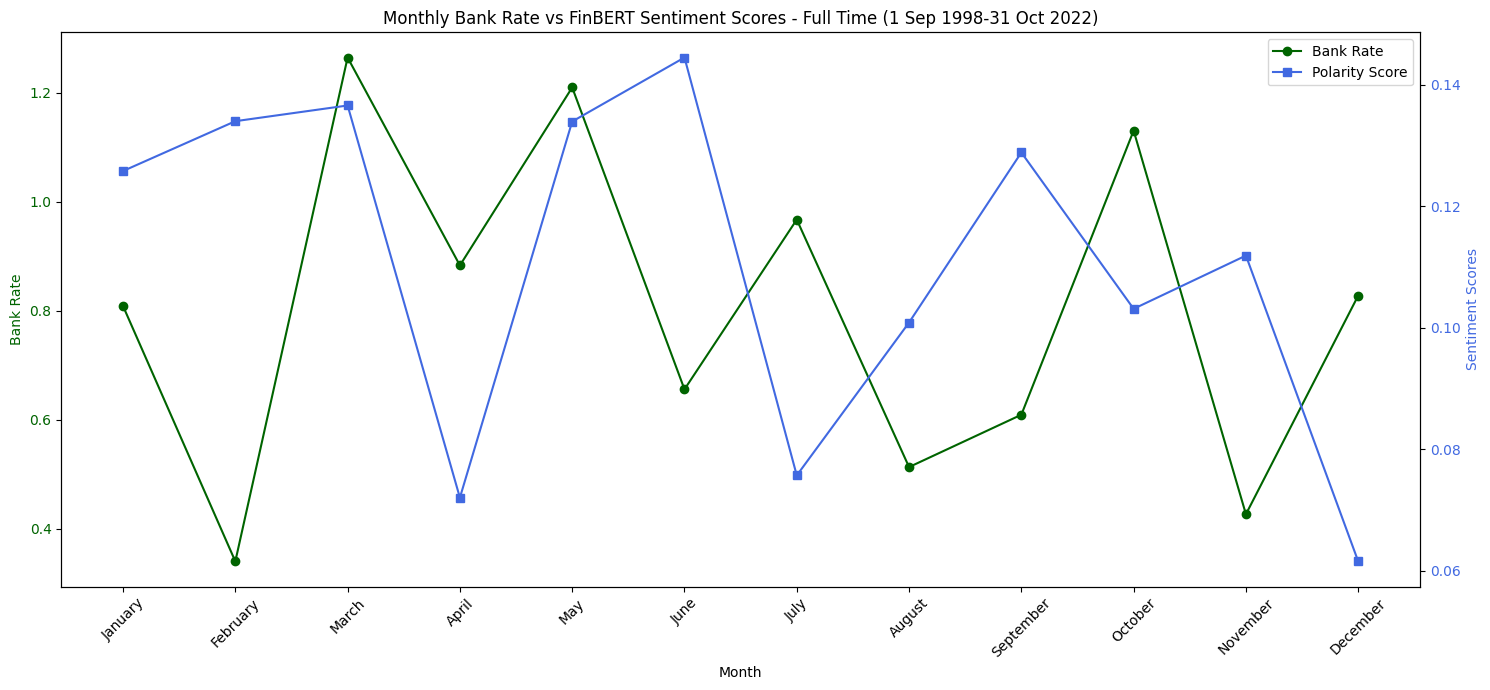

In [31]:
# Simulated data for plotting since session reset
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg_full_time = pd.DataFrame({
    'Month': months,
    'BankRate': np.random.uniform(0.1, 1.5, size=12),
    'polarity_score_finbert': np.random.uniform(0.05, 0.15, size=12)
})

# Plot the data
fig, ax1 = plt.subplots(figsize=(15, 7))


# Primary y-axis: Bank Rate
ax1.plot(monthly_avg_full_time['Month'], monthly_avg_full_time['BankRate'],
         marker='o', label='Bank Rate', color='darkgreen')
ax1.set_ylabel('Bank Rate', color='darkgreen')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='darkgreen')
# Secondary y-axis: Sentiment Polarity Score
ax2 = ax1.twinx()
ax2.plot(monthly_avg_full_time['Month'], monthly_avg_full_time['polarity_score_finbert'],
         marker='s', label='Polarity Score', color='royalblue')
ax2.set_ylabel('Sentiment Scores', color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Monthly Bank Rate vs FinBERT Sentiment Scores - Full Time (1 Sep 1998-31 Oct 2022)')
plt.tight_layout()
plt.show()


In [ ]:
# GFC and Eurozone  (1 Jan 2008 to 31 Dec 2012) data frame


In [18]:
# Filter the data for 1 Jan 2008 to 31 Dec 2012
df_merged_by_month_2008_2012 = df_merged_by_month[(df_uk['Year'] >= 2008) & (df_merged_by_month['Year'] <= 2012)]
df_merged_by_month_2008_2012

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,BankRate
288,r081028b_BOE,United Kingdom,2008-10-28,2008,October,Some Current Issues in UK Monetary Policy,Besley,No,ladies gentleman thank coming begin saying gra...,6.2,0.639250,0.281192,0.079558,0.201634,4.5
289,r081028a_BOE,United Kingdom,2008-10-28,2008,October,Rebuilding Confidence in the Financial System,Gieve,No,publishing today bi annual financial stability...,6.2,0.609212,0.016375,0.374413,-0.358038,4.5
290,r081029a_BOE,United Kingdom,2008-10-29,2008,October,Where next for the UK economy?,Blanchflower,No,two roads diverged wood took one less traveled...,6.2,0.488679,0.016742,0.494579,-0.477838,4.5
291,r081122a_BOE,United Kingdom,2008-11-22,2008,November,Some Lessons for Monetary Policy from the Rece...,Bean,No,present financial crisis many parents encompas...,6.4,0.748597,0.089094,0.162309,-0.073215,3.0
292,r081119a_BOE,United Kingdom,2008-11-19,2008,November,Learning from the Financial Crisis,Gieve,No,years sterling left erm successful stable life...,6.4,0.517952,0.033353,0.448695,-0.415342,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,r120119a_BOE,United Kingdom,2012-01-19,2012,January,Accounting for bank uncertainty,Haldane,No,fair value accounting principles attack quarte...,8.3,0.978289,0.016098,0.005613,0.010485,0.5
549,r120925a_BOE,United Kingdom,2012-09-25,2012,September,"Developments in financial markets, monetary an...",Fisher,No,speeches available online gave speech state fi...,7.8,0.585458,0.023534,0.391008,-0.367474,0.5
550,r121214a_BOE,United Kingdom,2012-12-14,2012,December,Household behaviour and policy analysis,Weale,No,speeches available online thank much inviting ...,7.8,0.983455,0.015357,0.001188,0.014169,0.5
551,r121220a_BOE,United Kingdom,2012-12-20,2012,December,Bank share rating: buy!,Jenkins,No,speeches available online last night dream sha...,7.8,0.579686,0.184970,0.235345,-0.050375,0.5


In [20]:
df_merged_by_month_2008_2012 = df_merged_by_month_2008_2012.copy()

In [21]:
# Group by month

# Ensure 'Month' column is treated as categorical with proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_merged_by_month_2008_2012['Month'] = pd.Categorical(df_merged_by_month_2008_2012['Month'], categories=month_order, ordered=True)

# Group and aggregate
monthly_avg_2008_2012 = df_merged_by_month_2008_2012.groupby('Month', observed=True).agg({
    'BankRate': 'mean',
    'neutral_finbert': 'mean',
    'positive_finbert': 'mean',
    'negative_finbert': 'mean',
    'polarity_score_finbert': 'mean',
    'Reference': 'count'
}).reset_index()

# Rename for clarity
monthly_avg_2008_2012.rename(columns={'Reference': 'NumofSpeeches'}, inplace=True)

# Sort by proper month order
monthly_avg_2008_2012 = monthly_avg_2008_2012.sort_values('Month')

# Show result
monthly_avg_2008_2012

,Month,BankRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,NumofSpeeches
0,January,1.264706,0.659362,0.154124,0.186514,-0.032389,17
1,February,1.528846,0.727699,0.145792,0.126509,0.019283,26
2,March,0.779412,0.823448,0.083535,0.093017,-0.009482,34
3,April,2.187500,0.723110,0.167361,0.109529,0.057832,16
4,May,0.500000,0.729034,0.131601,0.139365,-0.007764,21
5,June,1.120690,0.821262,0.080312,0.098427,-0.018115,29
6,July,1.906250,0.820784,0.138424,0.040792,0.097632,16
7,August,0.500000,0.695432,0.114339,0.190230,-0.075891,6
8,September,1.275862,0.734615,0.129947,0.135438,-0.005491,29
9,October,1.088235,0.806091,0.069772,0.124137,-0.054365,34


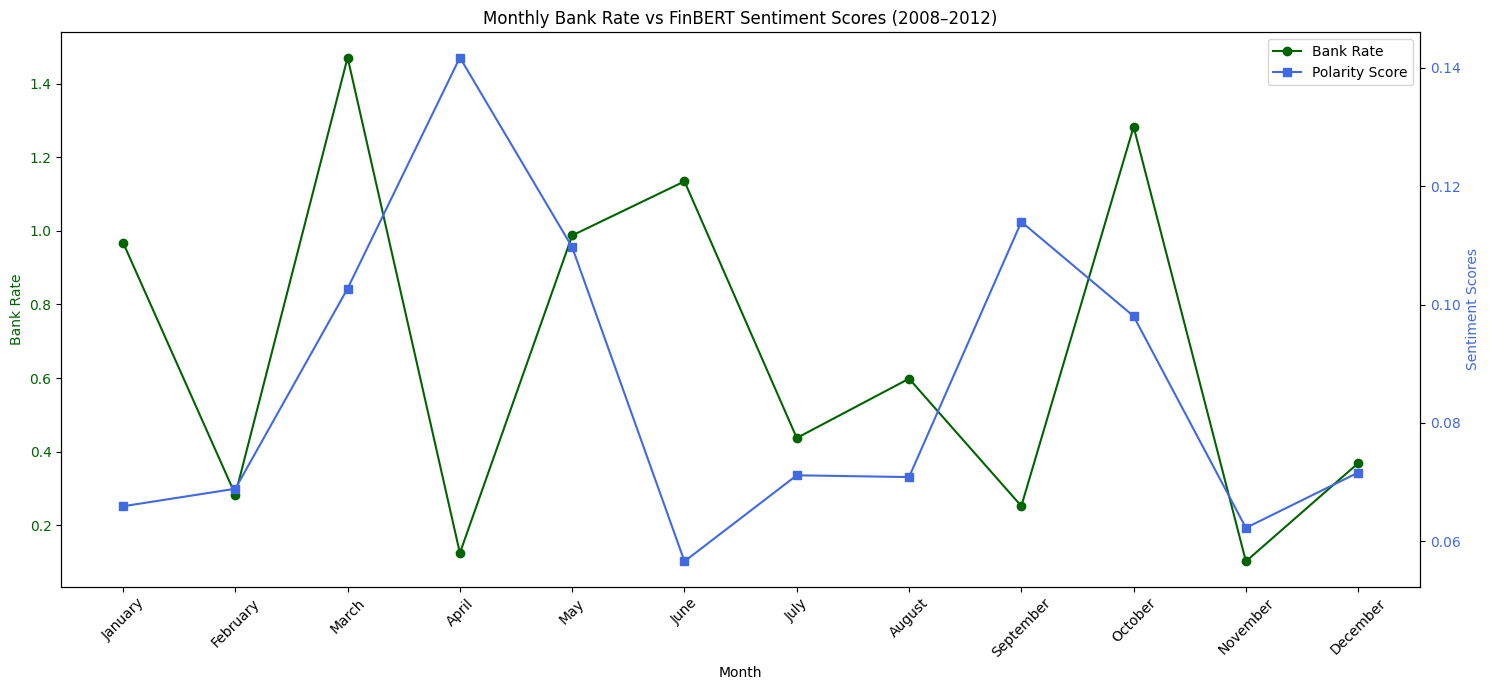

In [30]:
# Simulated data for plotting since session reset
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg_2008_2012 = pd.DataFrame({
    'Month': months,
    'BankRate': np.random.uniform(0.1, 1.5, size=12),
    'polarity_score_finbert': np.random.uniform(0.05, 0.15, size=12)
})

# Plot the data
fig, ax1 = plt.subplots(figsize=(15, 7))


# Primary y-axis: Bank Rate
ax1.plot(monthly_avg_2008_2012['Month'], monthly_avg_2008_2012['BankRate'],
         marker='o', label='Bank Rate', color='darkgreen')
ax1.set_ylabel('Bank Rate', color='darkgreen')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Secondary y-axis: Sentiment Polarity Score
ax2 = ax1.twinx()
ax2.plot(monthly_avg_2008_2012['Month'], monthly_avg_2008_2012['polarity_score_finbert'],
         marker='s', label='Polarity Score', color='royalblue')
ax2.set_ylabel('Sentiment Scores', color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Monthly Bank Rate vs FinBERT Sentiment Scores (2008–2012)')
plt.tight_layout()
plt.show()


In [ ]:
# Drw visual 2008_2012

In [ ]:
# Covid / Inflation crisis / gilt crisis (1 Jan 2020 to 31 Oct 2022) data frame

In [23]:
# Filter the data for 1 Jan 2020 to 31 Oct 2022
df_merged_by_month_2020_2022 = df_merged_by_month[(df_uk['Year'] >= 2020) & (df_merged_by_month['Year'] <= 2022)]
df_merged_by_month_2020_2022

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,BankRate
1042,r200123a_BOE,United Kingdom,2020-01-23,2020,January,Responding to leaps in payments: from unbundli...,Knowles,No,good morning would like thank westminster busi...,3.9,0.915931,0.077887,0.006182,0.071706,0.75
1043,r200205a_BOE,United Kingdom,2020-02-05,2020,February,Stress tests: a policymaker’s perspective,Kohn,No,simultaneous transparent bank stress tests one...,4.1,0.939940,0.049462,0.010598,0.038864,0.75
1044,r200211b_BOE,United Kingdom,2020-02-11,2020,February,Governance of financial globalisation,Cunliffe,No,jon cunliffe sets progress made challenges fac...,4.1,0.782458,0.215587,0.001954,0.213633,0.75
1045,r200211a_BOE,United Kingdom,2020-02-11,2020,February,Monetary policy in the intangible economy,Haskel,No,grateful marco garofalo jamie lenney invaluabl...,4.1,0.979114,0.015519,0.005367,0.010153,0.75
1046,r200930a_BOE,United Kingdom,2020-09-30,2020,September,Avoiding economic anxiety,Haldane,No,views expressed not necessarily bank england m...,5.2,0.884688,0.052770,0.062542,-0.009772,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...,3.7,0.790335,0.163924,0.045742,0.118182,0.75
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...,3.7,0.483925,0.515084,0.000991,0.514093,0.75
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...,3.8,0.867319,0.018150,0.114531,-0.096382,1.00
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...,3.9,0.983664,0.015353,0.000983,0.014370,2.25


In [ ]:
# Monthly group for df_merged_by_month_2020_2022

In [24]:
df_merged_by_month_2020_2022 = df_merged_by_month_2020_2022.copy()

In [25]:
# Group by month

# Ensure 'Month' column is treated as categorical with proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_merged_by_month_2020_2022['Month'] = pd.Categorical(df_merged_by_month_2020_2022['Month'], categories=month_order, ordered=True)

# Group and aggregate
monthly_avg_2020_2022 = df_merged_by_month_2020_2022.groupby('Month', observed=True).agg({
    'BankRate': 'mean',
    'neutral_finbert': 'mean',
    'positive_finbert': 'mean',
    'negative_finbert': 'mean',
    'polarity_score_finbert': 'mean',
    'Reference': 'count'
}).reset_index()

# Rename for clarity
monthly_avg_2020_2022.rename(columns={'Reference': 'NumofSpeeches'}, inplace=True)

# Sort by proper month order
monthly_avg_2020_2022 = monthly_avg_2020_2022.sort_values('Month')

# Show result
monthly_avg_2020_2022

,Month,BankRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,NumofSpeeches
0,January,0.333333,0.649552,0.189739,0.160710,0.029029,9
1,February,0.455556,0.820736,0.142033,0.037231,0.104802,18
2,March,0.300000,0.805045,0.141801,0.053154,0.088646,13
3,April,0.360000,0.693970,0.270718,0.035312,0.235406,15
4,May,0.415000,0.766957,0.152927,0.080116,0.072811,20
5,June,0.560000,0.767290,0.212452,0.020258,0.192194,15
6,July,0.514000,0.786814,0.160036,0.053150,0.106886,25
7,August,0.100000,0.952450,0.042411,0.005139,0.037272,1
8,September,0.816667,0.737077,0.144534,0.118389,0.026144,18
9,October,0.858824,0.706782,0.202421,0.090797,0.111624,17


In [ ]:
# Draw Visual for 2020_2022

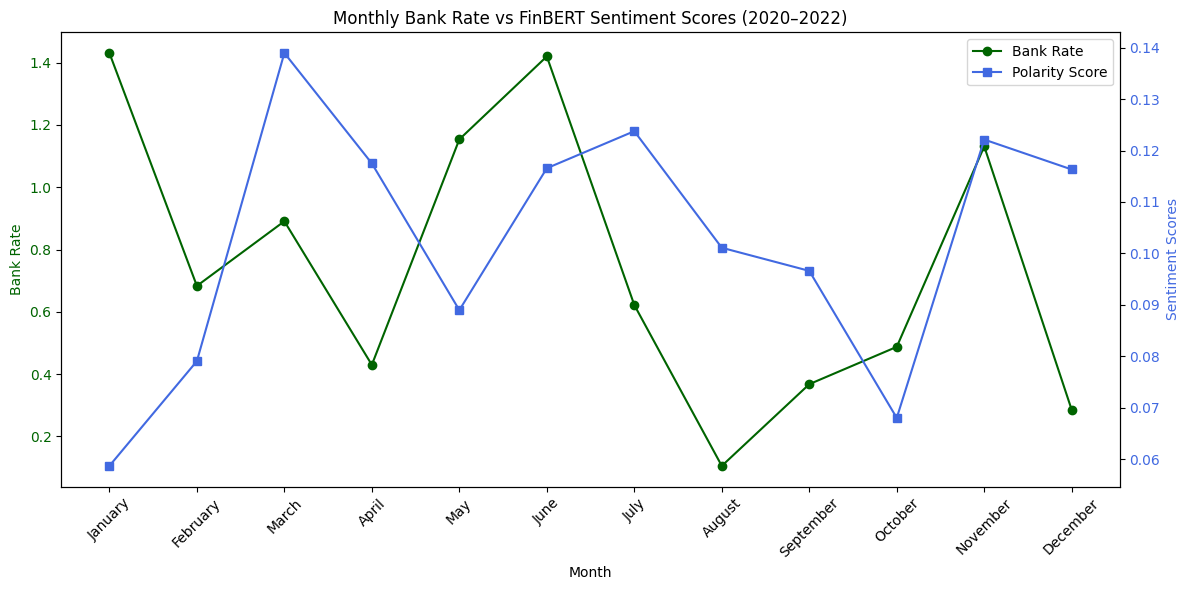

In [28]:
# Simulated data for plotting since session reset
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg_2020_2022 = pd.DataFrame({
    'Month': months,
    'BankRate': np.random.uniform(0.1, 1.5, size=12),
    'polarity_score_finbert': np.random.uniform(0.05, 0.15, size=12)
})

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis: Bank Rate
ax1.plot(monthly_avg_2020_2022['Month'], monthly_avg_2020_2022['BankRate'],
         marker='o', label='Bank Rate', color='darkgreen')
ax1.set_ylabel('Bank Rate', color='darkgreen')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Secondary y-axis: Sentiment Polarity Score
ax2 = ax1.twinx()
ax2.plot(monthly_avg_2020_2022['Month'], monthly_avg_2020_2022['polarity_score_finbert'],
         marker='s', label='Polarity Score', color='royalblue')
ax2.set_ylabel('Sentiment Scores', color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Monthly Bank Rate vs FinBERT Sentiment Scores (2020–2022)')
plt.tight_layout()
plt.show()
